### Taking the best performing of BRCA dataset and applying our findings to PPMI transcripts data

In [2]:
import sys
import importlib
import pickle

# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# pytorch specific
import torch
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

# project specific
sys.path.append('../')
from src import config
from src.utils import visualisation, benchmark, helpers, monitoring, experiment
from src.models import model


from matplotlib.animation import FuncAnimation
from IPython.display import HTML

pd.options.display.width = 1000
DEVICE = torch.device(config["DEVICE"])

input shape : 3242
(1231, 3242)
(1231, 1, 3242)
train data: 1231
Running the following configuration:
../workfiles/light_BRCA_ds.pkl
{'variational': False, 'convolution': True, 'transformer': False, 'dropout': 0.3, 'latent_dim': 16, 'padding': 2, 'kernel_size': 5}


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
 30%|███       | 9/30 [00:15<00:30,  1.47s/it]

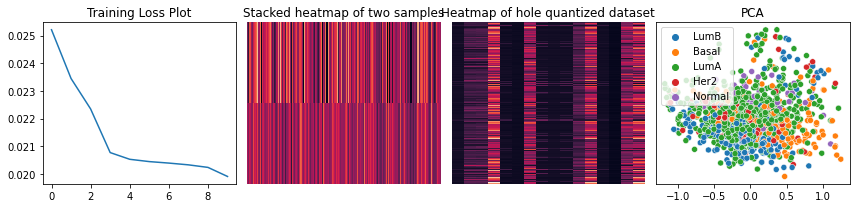

 33%|███▎      | 10/30 [00:17<00:36,  1.81s/it]

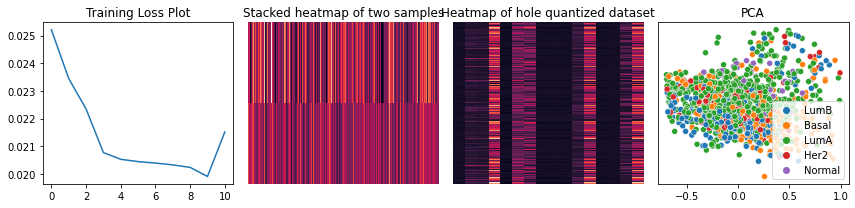

 40%|████      | 12/30 [00:21<00:34,  1.91s/it]

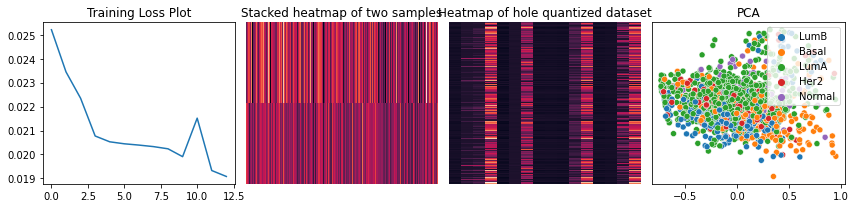

 47%|████▋     | 14/30 [00:25<00:30,  1.93s/it]

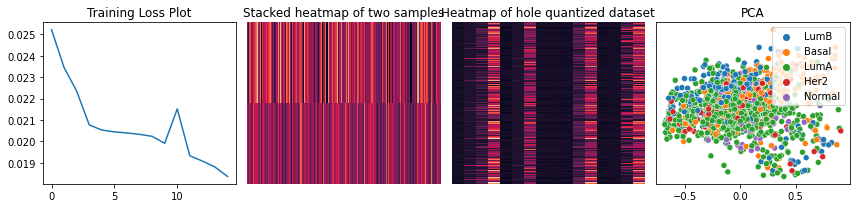

 53%|█████▎    | 16/30 [00:29<00:27,  1.96s/it]

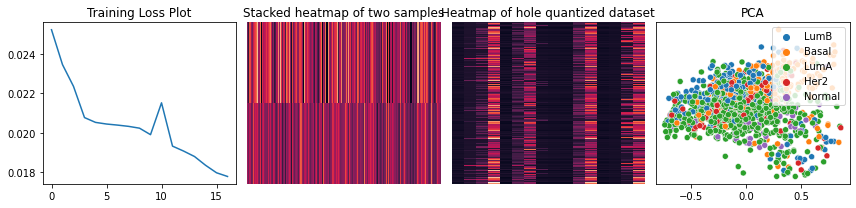

 63%|██████▎   | 19/30 [00:35<00:20,  1.85s/it]

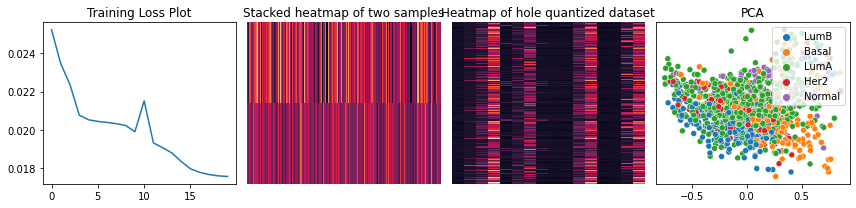

 73%|███████▎  | 22/30 [00:42<00:15,  1.98s/it]

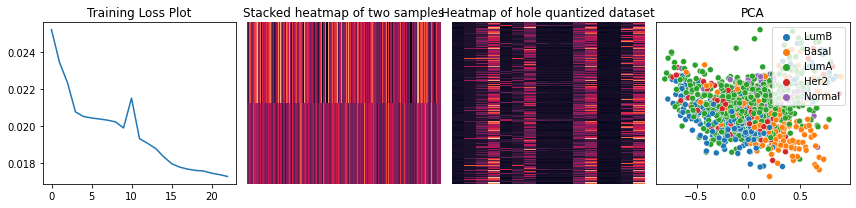

 83%|████████▎ | 25/30 [00:47<00:09,  1.83s/it]

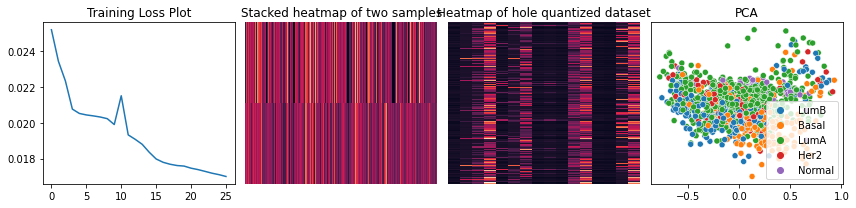

 97%|█████████▋| 29/30 [00:55<00:01,  1.74s/it]

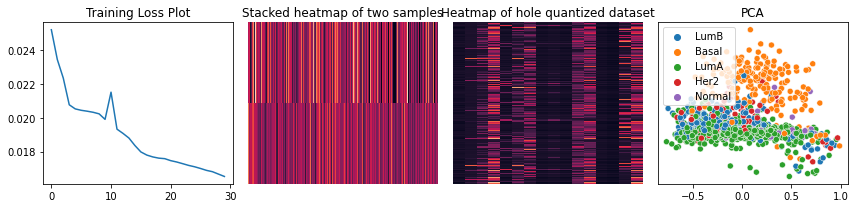

100%|██████████| 30/30 [00:57<00:00,  1.92s/it]


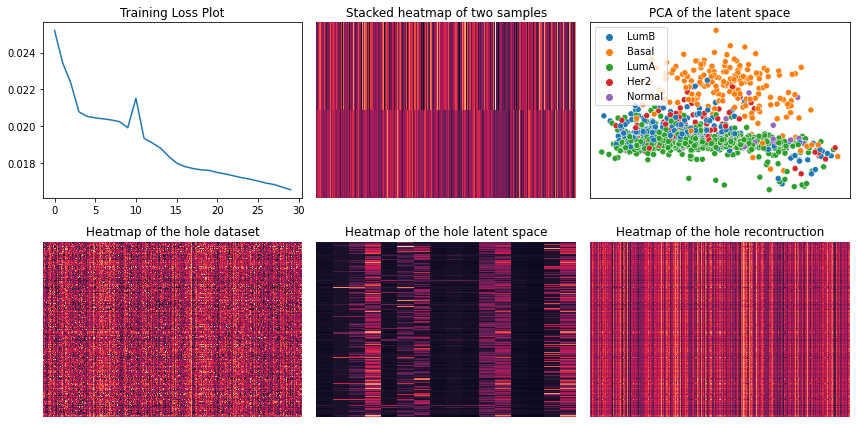

Silhouette score for 5 clusters: 0.2806650698184967


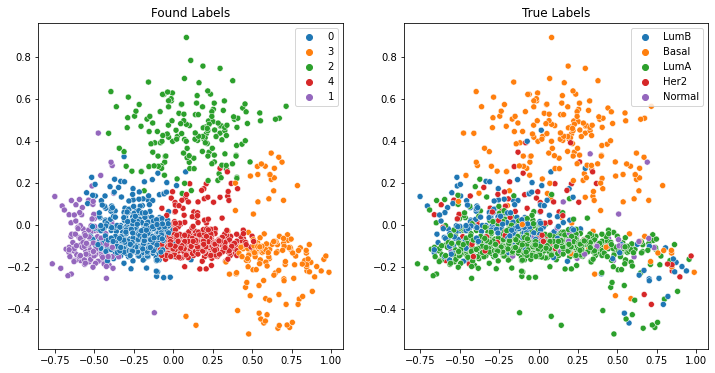

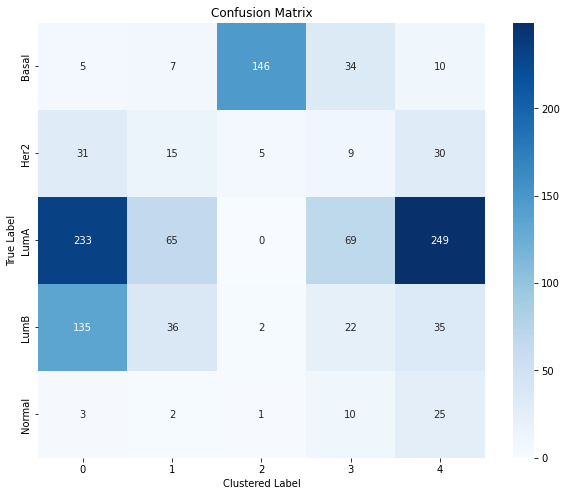

Adjusted Rand Index (ARI): 0.17
Normalized Mutual Information (NMI): 0.24
Fowlkes-Mallows Index: 0.42
Homogeneity: 0.26
Completeness: 0.22
V-measure: 0.24
Silhouette Score: 0.28


In [7]:
best_performing_config = {'variational': False, 'convolution': True, 'transformer': False, 'dropout': 0.3, 'latent_dim': 16, 'padding': 2, 'kernel_size': 5}
data_param = "../workfiles/light_BRCA_ds.pkl"

e = experiment.Experiment(data_param, best_performing_config, verbose = 2, n_epoch = 30)
e.run()

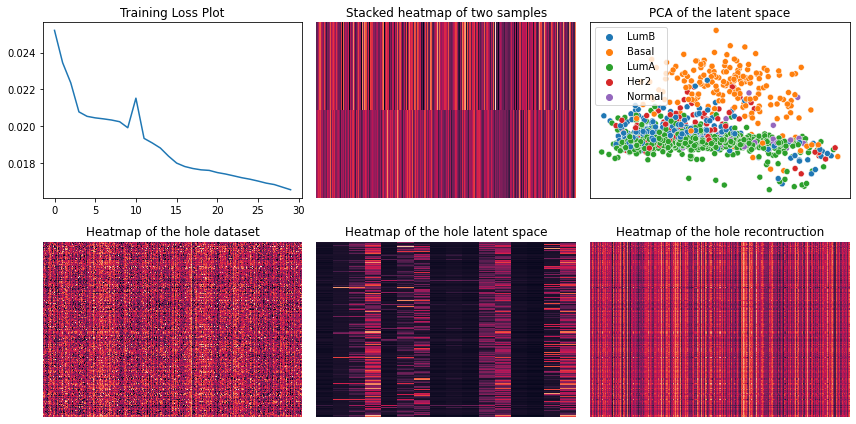

In [11]:
importlib.reload(visualisation)
visualisation.post_training_viz(e.data, e.dataloader, e.model, DEVICE, e.monitor.train_res_recon_error, labels = e.metadata["subtypes"])

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


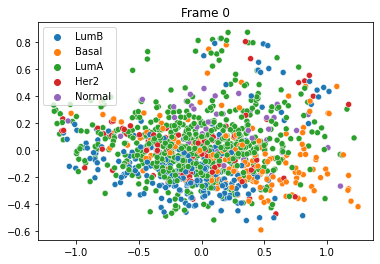

In [13]:
# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Define an update function for the animation
def update(frame):
    ax.clear()
    ax.set_title(f'Frame {frame}')
    
    # Get the PCA result for the current frame
    pca_result = e.monitor.frames[frame]
    
    # Scatter plot of PCA results with color based on index
    sns.scatterplot(x=pca_result[:, 1], y=pca_result[:, 2], hue=e.metadata["subtypes"])


# Create the animation
ani = FuncAnimation(fig, update, frames=len(e.monitor.frames), repeat=True)

# Display the animation as HTML
HTML(ani.to_jshtml())

# now we use PPMI data

In [3]:
best_performing_config = {'variational': False, 'convolution': True, 'transformer': False, 'dropout': 0.3, 'latent_dim': 16, 'padding': 2, 'kernel_size': 5}
data_param = '../workfiles/PPMI_transcript.pkl'

e = experiment.Experiment(data_param, best_performing_config, verbose = 2, n_epoch = 30)
e.run()

input shape : 23797
(1521, 23797)
(1521, 1, 23797)
train data: 1521
Running the following configuration:
../workfiles/PPMI_transcript.pkl
{'variational': False, 'convolution': True, 'transformer': False, 'dropout': 0.3, 'latent_dim': 16, 'padding': 2, 'kernel_size': 5}


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
  0%|          | 0/30 [00:06<?, ?it/s]


RuntimeError: MPS backend out of memory (MPS allocated: 6.42 GB, other allocations: 1.18 GB, max allowed: 9.07 GB). Tried to allocate 2.11 GB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).